In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras.backend as K
tf.keras.backend.set_image_data_format('channels_last')
path = '/content/drive/MyDrive/new/base_dir2/train_dir2'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(64,64), class_mode='categorical')

Found 6066 images belonging to 7 classes.


In [7]:
import cv2
import os
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 64, 64, 3)
Batch Size for Output Image :  (32, 7)
Image Size of first image :  (64, 64, 3)
Output of first image :  (7,)


In [17]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B

img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
#x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
#x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

#optimizer = Adadelta(lr=0.001,rho=0.95,epsilon=1e-07)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer =SGD(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [14]:
val_path = '/content/drive/MyDrive/new/base_dir2/test_dir2/val_dir2'
val_datagen = ImageDataGenerator(rescale=1. / 255)
val = val_datagen.flow_from_directory(val_path, target_size=(64,64), class_mode='categorical')

Found 2028 images belonging to 7 classes.


In [15]:
#testing
path_test = '/content/drive/MyDrive/new/base_dir2/test_dir2/testing_dir2'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(64,64), class_mode='categorical')

Found 2037 images belonging to 7 classes.


In [20]:
#using learning rate reduction,one additional layer and res 64x64,epochs=20
history=model.fit(train,epochs=20,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/20
190/190 [==============================] - 121s 638ms/step - loss: 1.0477 - accuracy: 0.6705 - val_loss: 0.9366 - val_accuracy: 0.6711
Epoch 2/20
190/190 [==============================] - 119s 625ms/step - loss: 0.9019 - accuracy: 0.6766 - val_loss: 0.8685 - val_accuracy: 0.6686
Epoch 3/20
190/190 [==============================] - 119s 625ms/step - loss: 0.8508 - accuracy: 0.6881 - val_loss: 0.8323 - val_accuracy: 0.6903
Epoch 4/20
190/190 [==============================] - 118s 622ms/step - loss: 0.8175 - accuracy: 0.7082 - val_loss: 0.8069 - val_accuracy: 0.6943
Epoch 5/20
190/190 [==============================] - 119s 628ms/step - loss: 0.7780 - accuracy: 0.7128 - val_loss: 0.7807 - val_accuracy: 0.7066
Epoch 6/20
190/190 [==============================] - 118s 622ms/step - loss: 0.7538 - accuracy: 0.7206 - val_loss: 0.7994 - val_accuracy: 0.7046
Epoch 7/20
190/190 [==============================] - 117s 618ms/step - loss: 0.7206 - accuracy: 0.7334 - val_loss: 0.7787 -

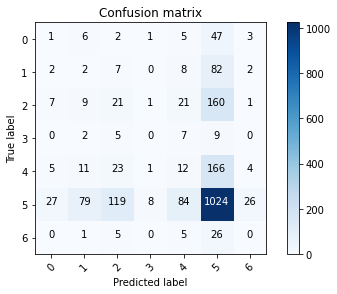

In [29]:
def plot_confusion_matrix2(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
#Y_pred = model.predict(test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix2(cm1, classes = range(7))

64/64 [==============================] - 495s 8s/step


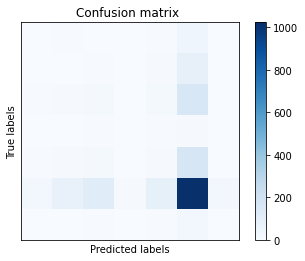

Confusion: [[   1    6    2    1    5   47    3]
 [   2    2    7    0    8   82    2]
 [   7    9   21    1   21  160    1]
 [   0    2    5    0    7    9    0]
 [   5   11   23    1   12  166    4]
 [  27   79  119    8   84 1024   26]
 [   0    1    5    0    5   26    0]]
Accuracy :  0.0014727540500736377
Accuracy 2: 0.5203730976926854
Sensitivity :  0.14285714285714285
Specificity :  0.5
Recall [0.01538462 0.01941748 0.09545455 0.         0.05405405 0.74908559
 0.        ]
Precision [0.02380952 0.01818182 0.11538462 0.         0.08450704 0.67635403
 0.        ]
F1 [0.01869159 0.01877934 0.10447761 0.         0.06593407 0.71086428
 0.        ]


In [23]:
predictions = model.predict(test,verbose=1)  #for confusion metric
#6
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
test_labels=test.classes
cm1=confusion_matrix(test_labels, predictions.argmax(axis=1))
# or
#cm = np.array([[1401,    0],[1112, 0]])
cm1_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']
plt.imshow(cm1, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# Accuracy
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(test_labels, predictions.argmax(axis=1))
# Recall
from sklearn.metrics import recall_score
RecallScore=recall_score(test_labels, predictions.argmax(axis=1), average=None)
# Precision
from sklearn.metrics import precision_score
Precision=precision_score(test_labels, predictions.argmax(axis=1), average=None)
from sklearn.metrics import f1_score
F1=f1_score(test_labels, predictions.argmax(axis=1), average=None)
total1=sum(sum(cm1))
print("Confusion:",cm1)
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
print("Accuracy 2:",Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("Recall",RecallScore)
print("Precision",Precision)
print("F1",F1)

In [24]:
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))
model.save("/content/drive/MyDrive/new/original.h5")

64/64 [==============================] - 26s 405ms/step - loss: 0.8055 - accuracy: 0.7595
Loss = 0.8055092692375183
Test Accuracy = 0.7594501972198486
64/64 [==============================] - 27s 423ms/step - loss: 0.8765 - accuracy: 0.7668
Loss = 0.8765026330947876
Validation Accuracy = 0.766765296459198


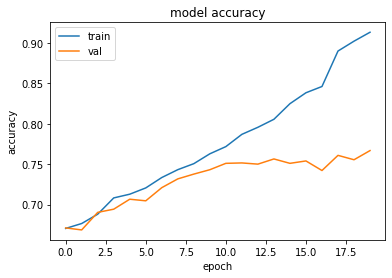

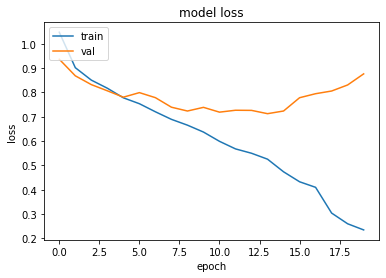

In [26]:
#with epochs 50
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#with epochs 7
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0, 0.5, 'Fraction classified incorrectly')

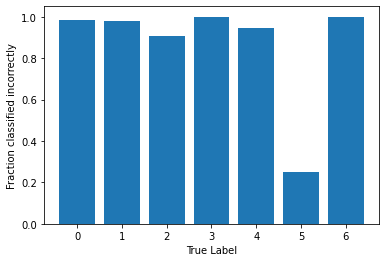

In [27]:
label_frac_error = 1 - np.diag(cm1) / np.sum(cm1, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

Text(0, 0.5, 'Fraction classified correctly')

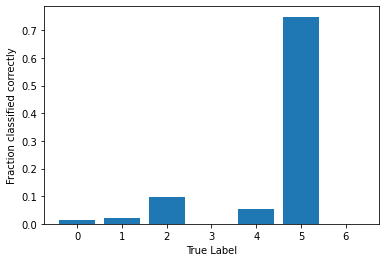

In [28]:
label_frac =  np.diag(cm1) / np.sum(cm1, axis=1)
plt.bar(np.arange(7),label_frac)
plt.xlabel('True Label')
plt.ylabel('Fraction classified correctly')